In [1]:
import ROOT as r
import platform, sys

Welcome to JupyROOT 6.24/00


# this works

In [ ]:
# https://root.cern.ch/doc/master/classTPDF.html

code = """
{
   TCanvas* canvas = new TCanvas("canvas");
   TH1F* histo = new TH1F("histo","test 1",10,0.,10.);
   histo->SetFillColor(2);
   histo->Fill(2.);
   histo->Draw();
   canvas->Print("plots.pdf(","Title:One bin filled");
   histo->Fill(4.);
   histo->Draw();
   canvas->Print("plots.pdf","Title:Two bins filled");
   histo->Fill(6.);
   histo->Draw();
   canvas->Print("plots.pdf","Title:Three bins filled");
   histo->Fill(8.);
   histo->Draw();
   canvas->Print("plots.pdf","Title:Four bins filled");
   histo->Fill(8.);
   histo->Draw();
   canvas->Print("plots.pdf)","Title:The fourth bin content is 2");
}
"""


# r.gROOT.ProcvessLine(code)

In [2]:
canvas = r.TCanvas("canvas","c",600,600);
histo = r.TH1F("histo","test 1",10,0.,10.);
histo.SetFillColor(2);
histo.Fill(2.);
histo.Draw();
canvas.Print("plots.pdf(","Title:One bin filled");
histo.Fill(4.);
histo.Draw();
canvas.Print("plots.pdf","Title:Two bins filled");
histo.Fill(6.);
histo.Draw();
canvas.Print("plots.pdf","Title:Three bins filled");
histo.Fill(8.);
histo.Draw();
canvas.Print("plots.pdf","Title:Four bins filled");
histo.Fill(8.);
histo.Draw();
canvas.Print("plots.pdf)","Title:The fourth bin content is 2");

Info in <TCanvas::Print>: pdf file plots.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to pdf file plots.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file plots.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file plots.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file plots.pdf and file closed


# does not work !

In [7]:
outname = "plots.pdf"

histo = r.TH1F("histo","test 1",10,0.,10.);
histo.SetFillColor(2);

canvas = r.TCanvas("canvas","c",600,600);

for i in range(4):
    # canvas = r.TCanvas("canvas","c",600,600);
    # canvas.Clear()
    #canvas.cd()
    histo.Fill(i*2);
    histo.Draw();

    if (i==0):
        canvas.Print(outname+"(","bin {}".format(i));
    elif (i==3):
        canvas.Print(outname+")","bin {}".format(i));
    else:
        canvas.Print(outname,"bin {}".format(i))

Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: bin 0 file plots.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to bin 1 file plots.pdf
Info in <TCanvas::Print>: Current canvas added to bin 2 file plots.pdf
Info in <TCanvas::Print>: Current canvas added to bin 3 file plots.pdf and file closed


# does not work !

In [2]:
outname = "plots.pdf"
histo = r.TH1F("histo","test 1",10,0.,10.);
histo.SetFillColor(2);

canvas = r.TCanvas("canvas","c",600,600);

In [3]:
i = 0
histo.Fill(i*2);

#canvas.Clear()
histo.Draw();
canvas.Print(outname+"(","bin {}".format(i));

Info in <TCanvas::Print>: bin 0 file plots.pdf has been created using the current canvas


In [4]:
i = 1
histo.Fill(i*2);

#canvas.Clear()
histo.Draw();
canvas.Print(outname,"bin {}".format(i));

Info in <TCanvas::Print>: Current canvas added to bin 1 file plots.pdf


In [5]:
i = 2
histo.Fill(i*2);

#canvas.Clear()
histo.Draw();
canvas.Print(outname,"bin {}".format(i));

Info in <TCanvas::Print>: Current canvas added to bin 2 file plots.pdf


In [6]:
i = 3
histo.Fill(i*2);

#canvas.Clear()
histo.Draw();
canvas.Print(outname+")","bin {}".format(i));

Info in <TCanvas::Print>: Current canvas added to bin 3 file plots.pdf and file closed


# use different canvas

Warning in <TROOT::Append>: Replacing existing TH1: h_0a (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1a (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2a (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3a (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_4a (Potential memory leak).


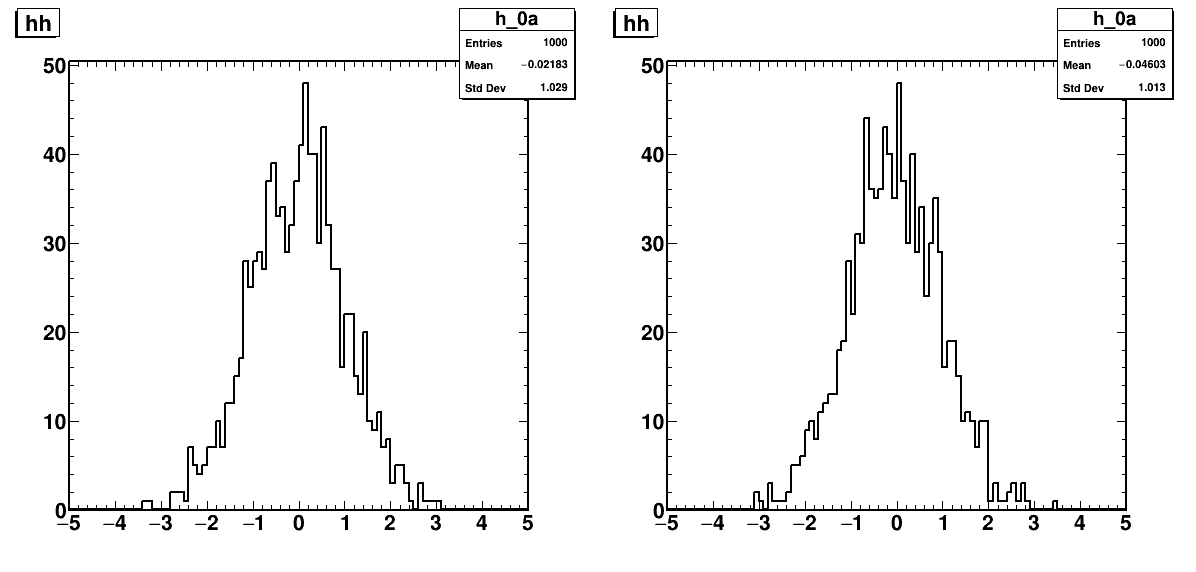

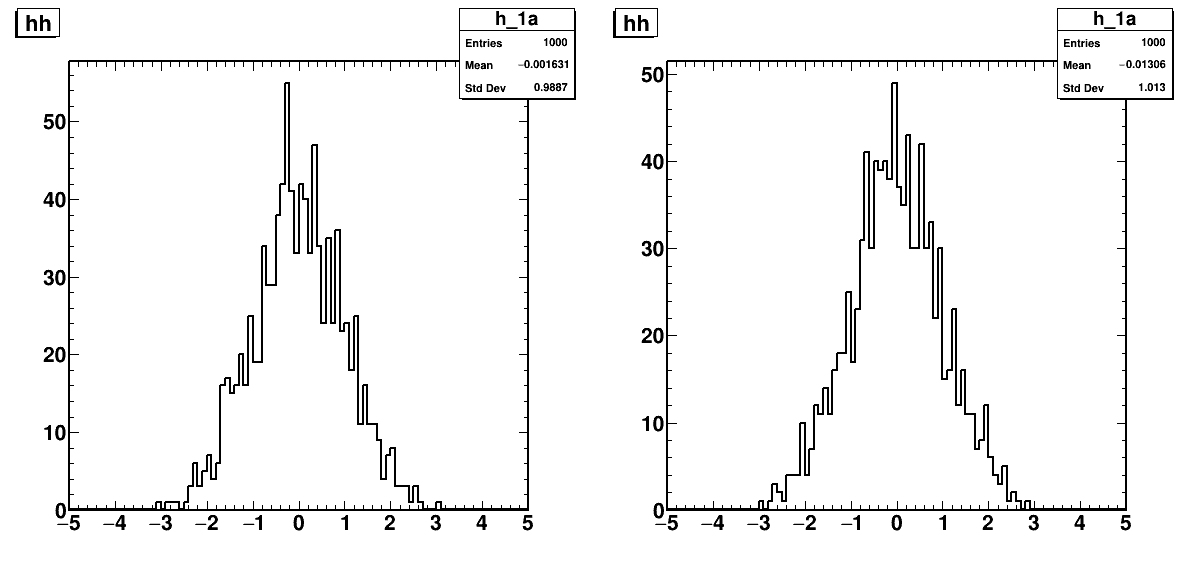

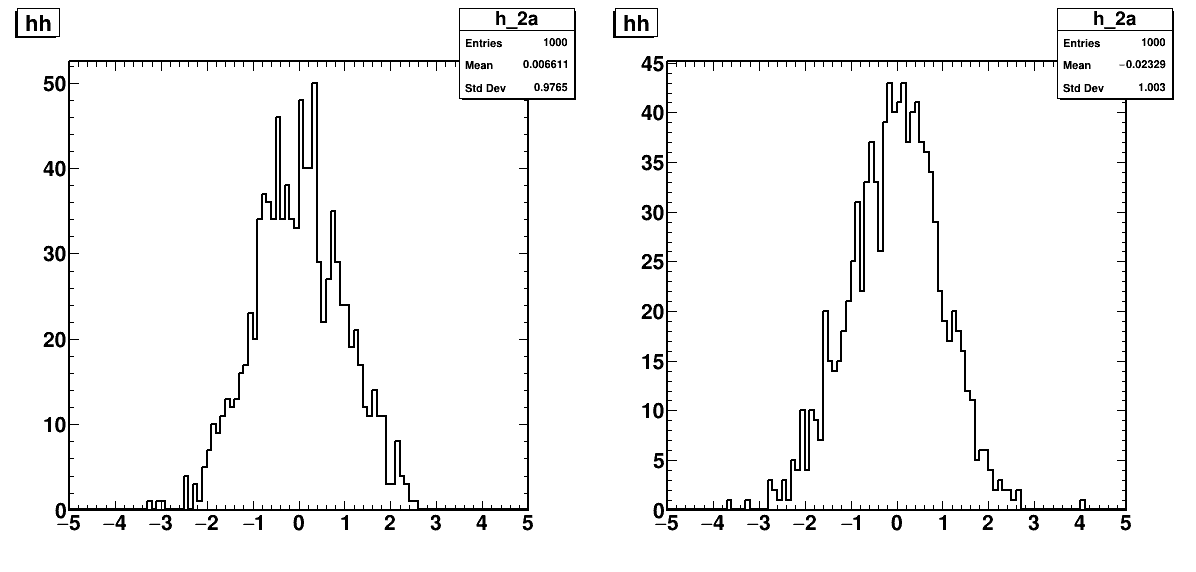

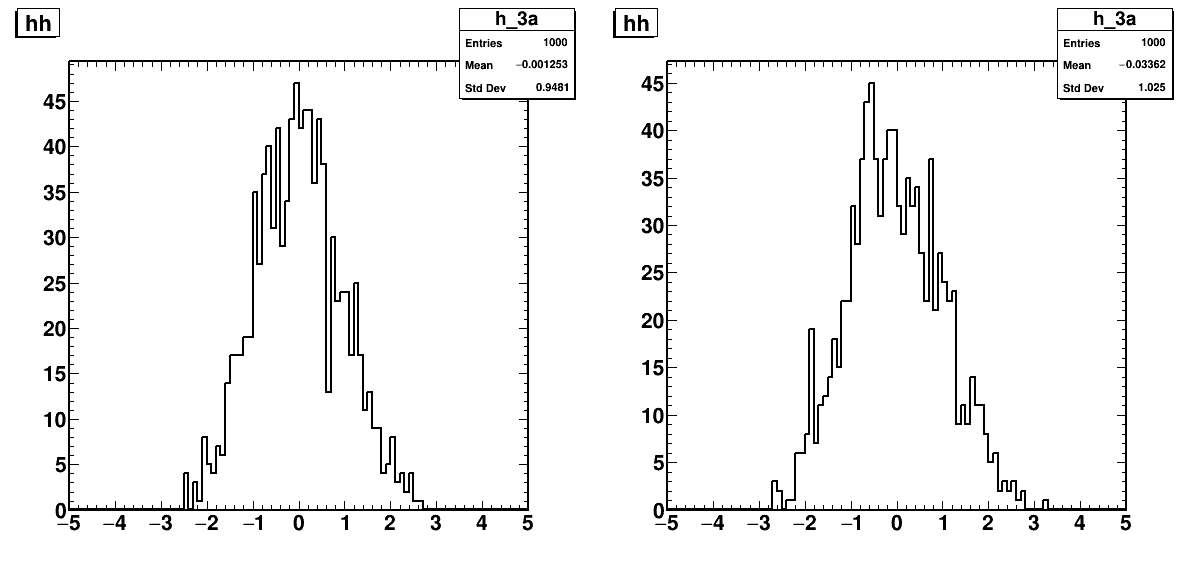

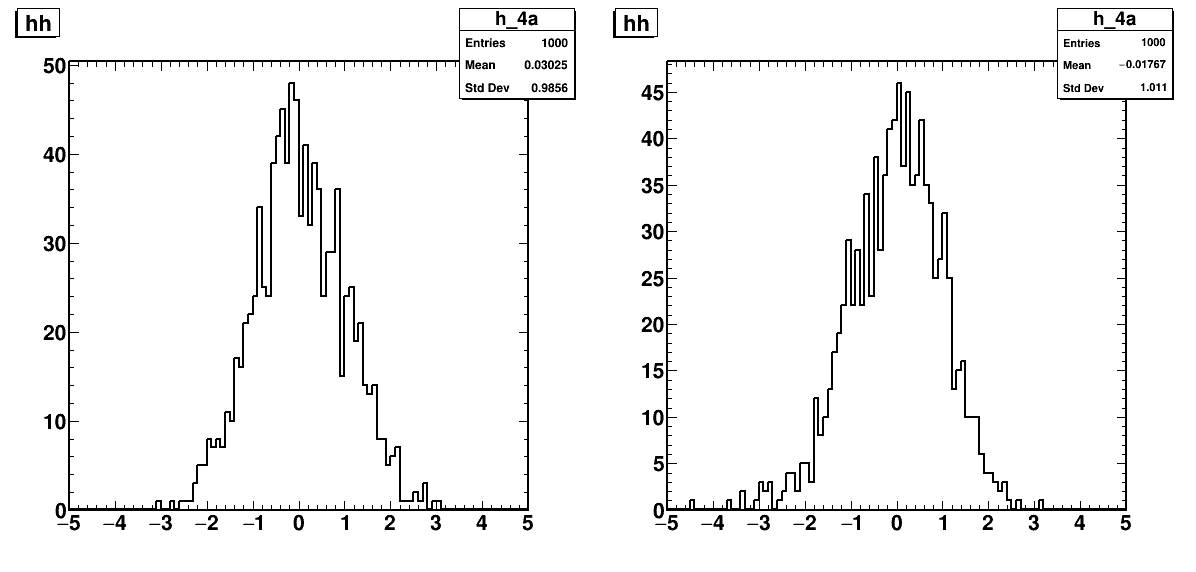

In [12]:
outname = "plots2.pdf"

cvs = []
hists = []


for i in range(5):
    c = r.TCanvas("c_{}".format(i),"c",1200,600)
    h1 = r.TH1D("h_{}a".format(i),"hh",100,-5,5)
    h2 = r.TH1D("h_{}a".format(i),"hh",100,-5,5)

    h1.FillRandom("gaus",1000)
    h2.FillRandom("gaus",1000)
    c.Divide(2,1)
    c.cd(1)
    h1.Draw("hist")
    c.cd(2)
    h2.Draw("hist")
    c.Draw()

    cvs.append(c)
    hists.append([h1,h2])

# does not work !

In [13]:
for i,c in enumerate(cvs):
    zzz = ""
    if (i==0):
        zzz = outname + "("
    elif((len(cvs)-i)==1):
        zzz = outname + ")"
    else:
        zzz = outname
        
    print(i,zzz)
    c.Print(zzz,"title for page {}".format(i+1))

0 plots2.pdf(
1 plots2.pdf
2 plots2.pdf
3 plots2.pdf
4 plots2.pdf)


Info in <TCanvas::Print>: title for page 1 file plots2.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to title for page 2 file plots2.pdf
Info in <TCanvas::Print>: Current canvas added to title for page 3 file plots2.pdf
Info in <TCanvas::Print>: Current canvas added to title for page 4 file plots2.pdf
Info in <TCanvas::Print>: Current canvas added to title for page 5 file plots2.pdf and file closed


# does not work !

In [7]:
i = 0
c = cvs[i]
c.cd()
c.Print("plots2.pdf(","page {}".format(i));

Info in <TCanvas::Print>: page 0 file plots2.pdf has been created


In [8]:
i = 1
c = cvs[i]
c.cd()
c.Print("plots2.pdf","page: {}".format(i));

Info in <TCanvas::Print>: Current canvas added to page: 1 file plots2.pdf


In [9]:
i = 2
c = cvs[i]
c.cd()
c.Print("plots2.pdf","page: {}".format(i));

Info in <TCanvas::Print>: Current canvas added to page: 2 file plots2.pdf


In [10]:
i = 3
c = cvs[i]
c.cd()
c.Print("plots2.pdf)","page {}".format(i));

Info in <TCanvas::Print>: page 3 file plots2.pdf has been closed
